## Lomb-Scargle
Application of Lomb-Scargle to Challenge data, to explore if periods can replace full time-series as summary data.
Author: Avon Huxor
Date: May 2017


In [1]:
# load required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gatspy import datasets, periodic
import math

In [2]:
# function to round figures for plot annotation purposes
def round_figures(x, n):
    """Returns x rounded to n significant figures."""
    return round(x, int(n - math.ceil(math.log10(abs(x)))))

In [3]:
#function to change Time to decimal float  (time_hours)
def time_to_decimal_years(a_df):
    times = a_df.Time
    length_file = len(times)
    length_file
    time_numeric = np.zeros([length_file])
    for n in range(0,length_file):
        time_parts = times[n].split(':')
        hours = float(time_parts[0])
        minutes = float(time_parts[1])
        time_numeric_single = round(hours + minutes/60,2)
        time_numeric[n] = time_numeric_single
    time_numeric
    time_numeric_df = pd.DataFrame(time_numeric)
    time_numeric_df.columns = ['time_hours']
    return time_numeric_df

### get list of data file names
#### only needed once, to create file of filenames

!ls set_A|cat>DirectoryA_listing.txt
!tail -2 DirectoryA_listing.txt

In [4]:
# read in list of file names into a df

set_A_filenames_df = pd.read_csv('DirectoryA_listing.txt',header=None)
set_A_filenames_df.columns=['filename']
set_A_filenames_df.head(3)


,filename
0,132539.txt
1,132540.txt
2,132541.txt


In [5]:
# for each .txt file in set_A_filenames, read in and save to its own named df
# add to a dictionary of patient IDs with their dfs

patient_ids = {}
for textfile in set_A_filenames_df.filename:
    'strip out patient number'
    id_num_string = textfile[:6]
    'get data'
    target_filename = 'set_A/'+ id_num_string + '.txt'
    new_df = pd.read_csv(target_filename)
    'create new dict entry'
    patient_ids[id_num_string] = new_df
    

In [6]:
# change date to decimal using function, and update df with new column

for patient in patient_ids:
    temp_df = (patient_ids[patient])
    updated_time_df = time_to_decimal_years(temp_df)
    updated_patient_df = pd.concat([temp_df,updated_time_df],axis=1)
    patient_ids[patient] = updated_patient_df


In [7]:
# divide sample into lists of dfs, by icu type
icu_1 = []
icu_2 = []
icu_3 = []
icu_4 = []
for patient in patient_ids.keys():
    temp_df = patient_ids[patient]
    icutype = temp_df[temp_df.Parameter=='ICUType'].Value
    icutype = icutype.astype(int)
    if icutype.values == 1:
        icu_1.append(temp_df)
    elif icutype.values == 2:
        icu_2.append(temp_df)
    elif icutype.values == 3:
        icu_3.append(temp_df)
    elif icutype.values == 4:
        icu_4.append(temp_df)

In [8]:
# inspect example of a patient's data
icu_3[0]

,Time,Parameter,Value,time_hours
0,00:00,RecordID,140376.0,0.00
1,00:00,Age,48.0,0.00
2,00:00,Gender,0.0,0.00
3,00:00,Height,-1.0,0.00
4,00:00,ICUType,3.0,0.00
5,00:00,Weight,94.2,0.00
6,00:14,GCS,15.0,0.23
7,00:14,HR,70.0,0.23
8,00:14,NIDiasABP,59.0,0.23
9,00:14,NIMAP,69.0,0.23


In [9]:
# print out size of each icu type
# note that icu 3 has most patients, type 3 = Medical ICU
# so we will focus at that ICU type for the moment
print('length icu1 = ', len(icu_1))
print('length icu2 = ', len(icu_2))
print('length icu3 = ', len(icu_3))
print('length icu4 = ', len(icu_4))

length icu1 =  577
length icu2 =  874
length icu3 =  1481
length icu4 =  1068


In [10]:
# for icu3, see which parameters have long time series
cutoff_for_ts = 30 # set minimum number of measurements for any parameter
list_long_ts_dfs = []
for m in range(0,len(icu_3)):
    patient_grouped_parameter = icu_3[m].groupby(by='Parameter').count()
    patient_grouped_parameters_long = patient_grouped_parameter[patient_grouped_parameter.Time > cutoff_for_ts]
    list_long_ts_dfs.append(patient_grouped_parameters_long)
    patient_grouped_parameters_long.index
    for parm in patient_grouped_parameters_long.index:
        print(parm)
    print('--------')
print('end')

HR
NIDiasABP
NIMAP
NISysABP
RespRate
Urine
Weight
--------
DiasABP
HR
MAP
SysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
--------
HR
NIDiasABP
NIMAP
NISysABP
Urine
--------
DiasABP
HR
MAP
RespRate
SysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Urine
--------
HR
NIDiasABP
NIMAP
NISysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Urine
Weight
--------
DiasABP
HR
MAP
SysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Urine
Weight
--------
DiasABP
HR
MAP
SysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
Urine
Weight
--------
HR
NIDiasABP
NIMAP
NISysABP
RespRate
Weight
--------
DiasABP
HR
MAP
SysABP
Urine
--------
DiasABP


In [11]:
bag_of_parameters=[]
for patient in list_long_ts_dfs:
    temp = patient.index.values.tolist()
    # get all parameters together
    bag_of_parameters.append(temp)
print(bag_of_parameters)


[['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Urine', 'Weight'], ['DiasABP', 'HR', 'MAP', 'SysABP', 'Urine', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Urine', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Urine'], ['DiasABP', 'HR', 'MAP', 'RespRate', 'SysABP', 'Urine', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Urine'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Urine', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Urine', 'Weight'], ['DiasABP', 'HR', 'MAP', 'SysABP', 'Urine', 'Weight'], ['HR', 'NIDiasABP', 'NIMAP', 'NISysABP', 'RespRate', 'Urine', 'Weight'], ['DiasABP', 'HR

In [12]:
def flattern(A):
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flattern(i))
        else: rt.append(i)
    return rt
flat_bag_of_parameters = flattern(bag_of_parameters) 
flat_bag_of_parameters


['HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Urine',
 'Weight',
 'DiasABP',
 'HR',
 'MAP',
 'SysABP',
 'Urine',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Urine',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Urine',
 'DiasABP',
 'HR',
 'MAP',
 'RespRate',
 'SysABP',
 'Urine',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Urine',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'Urine',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'HR',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'RespRate',
 'Urine',
 'Weight',
 'DiasABP',
 'HR',
 'MAP',
 'SysABP',
 'Urine',
 'Weight',
 'HR',
 'NIDiasABP',
 'NIMAP',

In [13]:
# convert bag of parameters to a dataframe, for a groupby operation
# we can now see the numbers of patients in ICU3 with named parameters measure 30+ times
highly_used_parameters_df = pd.DataFrame({'parameter': flat_bag_of_parameters})
highly_used_parameters_df.groupby('parameter').size()

parameter
DiasABP       553
FiO2            3
GCS            16
HR           1404
MAP           545
MechVent        1
NIDiasABP     857
NIMAP         842
NISysABP      857
PaCO2           1
PaO2            1
RespRate      503
SysABP        553
Temp           47
Urine         840
Weight       1016
pH              1
dtype: int64

Sun  7 May 2017 20:14:08 BST
n =  0
Finding optimal frequency:
 - Estimated peak width = 0.134
 - Using 5 steps per peak; omega_step = 0.0267
 - User-specified period range:  3 to 45
 - Computing periods at 75 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.134
 - Using 5 steps per peak; omega_step = 0.0267
 - User-specified period range:  3 to 45
 - Computing periods at 75 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
n =  1
Finding optimal frequency:
 - Estimated peak width = 0.132
 - Using 5 steps per peak; omega_step = 0.0265
 - User-specified period range:  2.7 to 46
 - Computing periods at 83 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.132
 - Using 5 steps per peak; omega_step = 0.0265
 - User-specified period range:  2.7 to 46
 - Computing periods at 83 steps
Zooming-in on 5 candidate peaks:

/Users/ahuxor/anaconda/lib/python3.4/site-packages/gatspy/periodic/_least_squares_mixin.py:79: RuntimeWarning: invalid value encountered in true_divide
  P = chi2_0_minus_chi2 / chi2_ref


n =  447
Finding optimal frequency:
 - Estimated peak width = 0.132
 - Using 5 steps per peak; omega_step = 0.0265
 - User-specified period range:  3.1 to 46
 - Computing periods at 73 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.132
 - Using 5 steps per peak; omega_step = 0.0265
 - User-specified period range:  3.1 to 46
 - Computing periods at 73 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
n =  448
Finding optimal frequency:
 - Estimated peak width = 0.133
 - Using 5 steps per peak; omega_step = 0.0266
 - User-specified period range:  2.7 to 45
 - Computing periods at 83 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.133
 - Using 5 steps per peak; omega_step = 0.0266
 - User-specified period range:  2.7 to 45
 - Computing periods at 83 steps
Zooming-in on 5 candidate peaks:
 - Computing period

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128f696a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x128fb6390>], dtype=object)

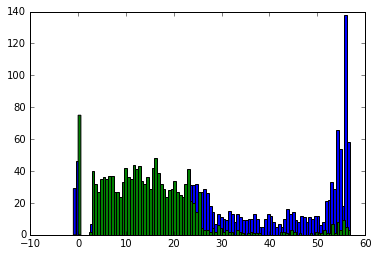

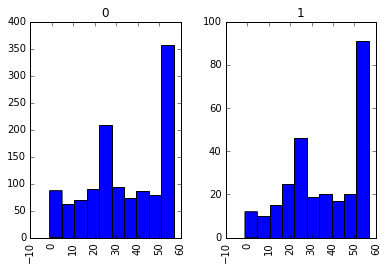

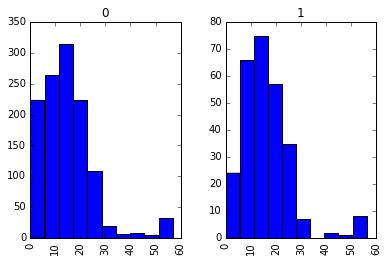

In [14]:
# Turn interactive plotting off
# for HEART RATE
# plt.ioff()

# take  icu_3 dfs and find best periods for a given parameter
# various cases to consider: 1) parameter of interest has no entries,
# 2) there are entries, but only a few, so no point in applying LS and 
# 3) enought to do LS
# note that time is in units of 'hours'.
!date

best_periods_icu3 = []
IDs = []
for n in range(0,len(icu_3)):
#for n in range(0,20):
    print('n = ',n)
    a_df  = icu_3[n]
    aa = a_df[a_df['Parameter']=='HR']
    patient_ID = a_df[a_df['Parameter']=='RecordID'].Value.values
    patient_ID1 = patient_ID.astype(int)[0]
    IDs.append(patient_ID1)
    if aa.empty:
        best_periods_icu3.append([0,0])
    elif len(aa)<30:
        best_periods_icu3.append([-1,0])
    else:
        time_series = aa.time_hours
        heart_rate = aa.Value
        model = periodic.LombScargle(fit_period=True)
        'need to adjust period limits in line below to suit each time series'
        number_points_in_time_series = len(time_series)
        range_in_time = time_series[-1:].values - time_series[:1].values
        min_period = range_in_time/number_points_in_time_series + 2
        max_period = range_in_time - 2
        model.optimizer.period_range = (min_period, max_period)
        model.fit(time_series, heart_rate)
        best_period = model.find_best_periods(2,return_scores=False)
        best_period = np.array(best_period).tolist()
        best_periods_icu3.append(best_period)
#        aa.plot('time_hours','Value',legend=False)
        kk = a_df[a_df['Parameter']=='RecordID'].Value.values
        kk1 = kk[0].astype(int)
        title_string = 'ID = '+str(kk1) + ' best-periods = '+str(best_period)
#        plt.title(title_string)
#        plt.savefig('icu3_hr_plots/ID'+str(kk1)+'.png')
#        plt.close()
!date


'add best periods for a patient ID to the appropriate dataframe'
best_periods_icu3[0][1]

period_one_hr =[]
period_two_hr =[]
# get periods: first best anf second best fit
for m in range(0,len(best_periods_icu3)):
    period_one_hr.append(best_periods_icu3[m][0])
    period_two_hr.append(best_periods_icu3[m][1])


%matplotlib inline
# plot histogrames
plt.hist(period_one_hr,bins=100)
plt.hist(period_two_hr,bins=100)

# read in outcomes, to see how periods correlate with outcome
outcomes_df = pd.read_csv('Outcomes.txt')
outcomes_df.head()
#need to get only those in ICU3

type(period_one_hr)
period_one_hr_df = pd.DataFrame({'period_one_hr': period_one_hr})
period_two_hr_df = pd.DataFrame({'period_two_hr': period_two_hr})


print(len(period_one_hr_df))
IDs_df = pd.DataFrame({'RecordID': IDs})
len(IDs_df)
result = pd.concat([IDs_df, period_one_hr_df], axis=1, join_axes=[IDs_df.index])

resultA = pd.concat([result, period_two_hr_df], axis=1, join_axes=[result.index])
result_hr = pd.merge(resultA, outcomes_df, on='RecordID')
result_hr.head()

result_hr.hist('period_one_hr','In-hospital_death')

result_hr.hist('period_two_hr','In-hospital_death')

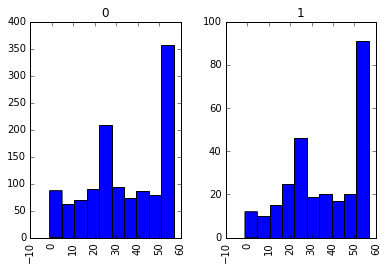

In [15]:
result_hr.hist('period_one_hr','In-hospital_death')

plt.savefig("distribution_periods_hists.pdf", bbox_inches = 'tight',
    pad_inches = 0.1)
